# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1. Посчитайте кол-во уникальных жанров. (1 балл)
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`. (1 балл)
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`. (1 балл)
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`. (1 балл)
5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`? (1 балл)
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий. (1 балл)
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`. (1 балл)
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)



In [1]:
import numpy as np
import pandas as pd

# Не обязательно, можно использовать любую удобную вам библиотеку для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0   801k      0 --:--:-- --:--:-- --:--:--  801k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [3]:
raw_df = pd.read_csv('anime.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


# 0. Utils

In [4]:
def visualize_histogram(x, y, xlabel: str, ylabel: str, title: str):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def visualize_histogram_for_continous_values(data, bins, xlabel: str, ylabel: str, title: str):
    plt.figure(figsize=(10, 6))
    
    plt.hist(data, bins=bins, color='lightblue', edgecolor='black')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

## 1. Посчитайте кол-во уникальных жанров. (1 балл)

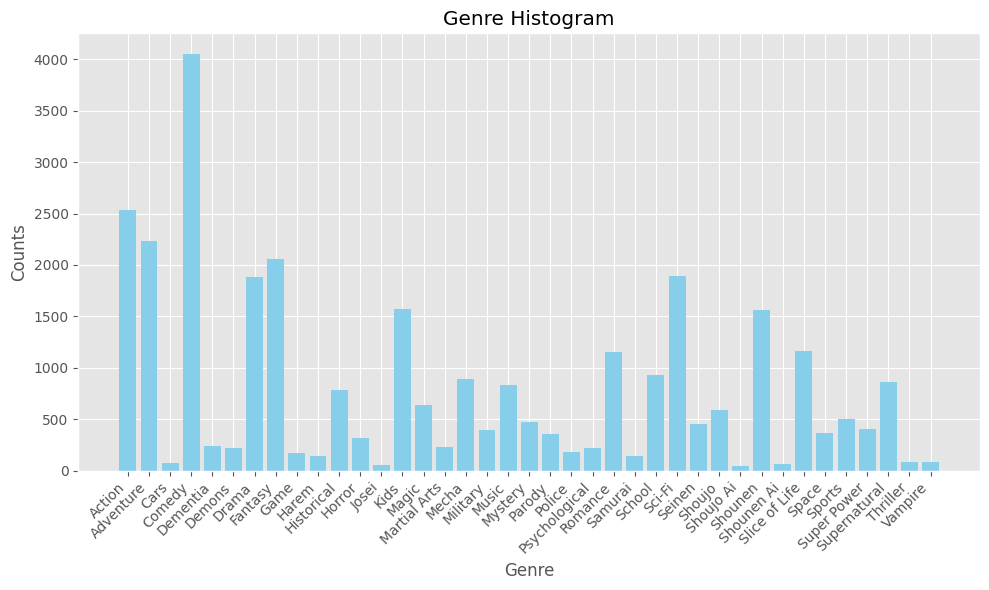

In [5]:
genre_df = raw_df.copy()
genre_df['processed_genre'] = genre_df['genre'].str.split(', ')
genre_df = genre_df.dropna()
genre_df['number_of_genres'] = genre_df['processed_genre'].apply(len)

genre_df = genre_df.explode('processed_genre')

genre_df['processed_genre'] = genre_df['processed_genre'].fillna('-1') # replace all NaN values
genre, genre_counts = np.unique(genre_df['processed_genre'], return_counts=True)

# Visualize genre histogram
visualize_histogram(genre, genre_counts, 'Genre', 'Counts', 'Genre Histogram')

## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type. (1 балл)

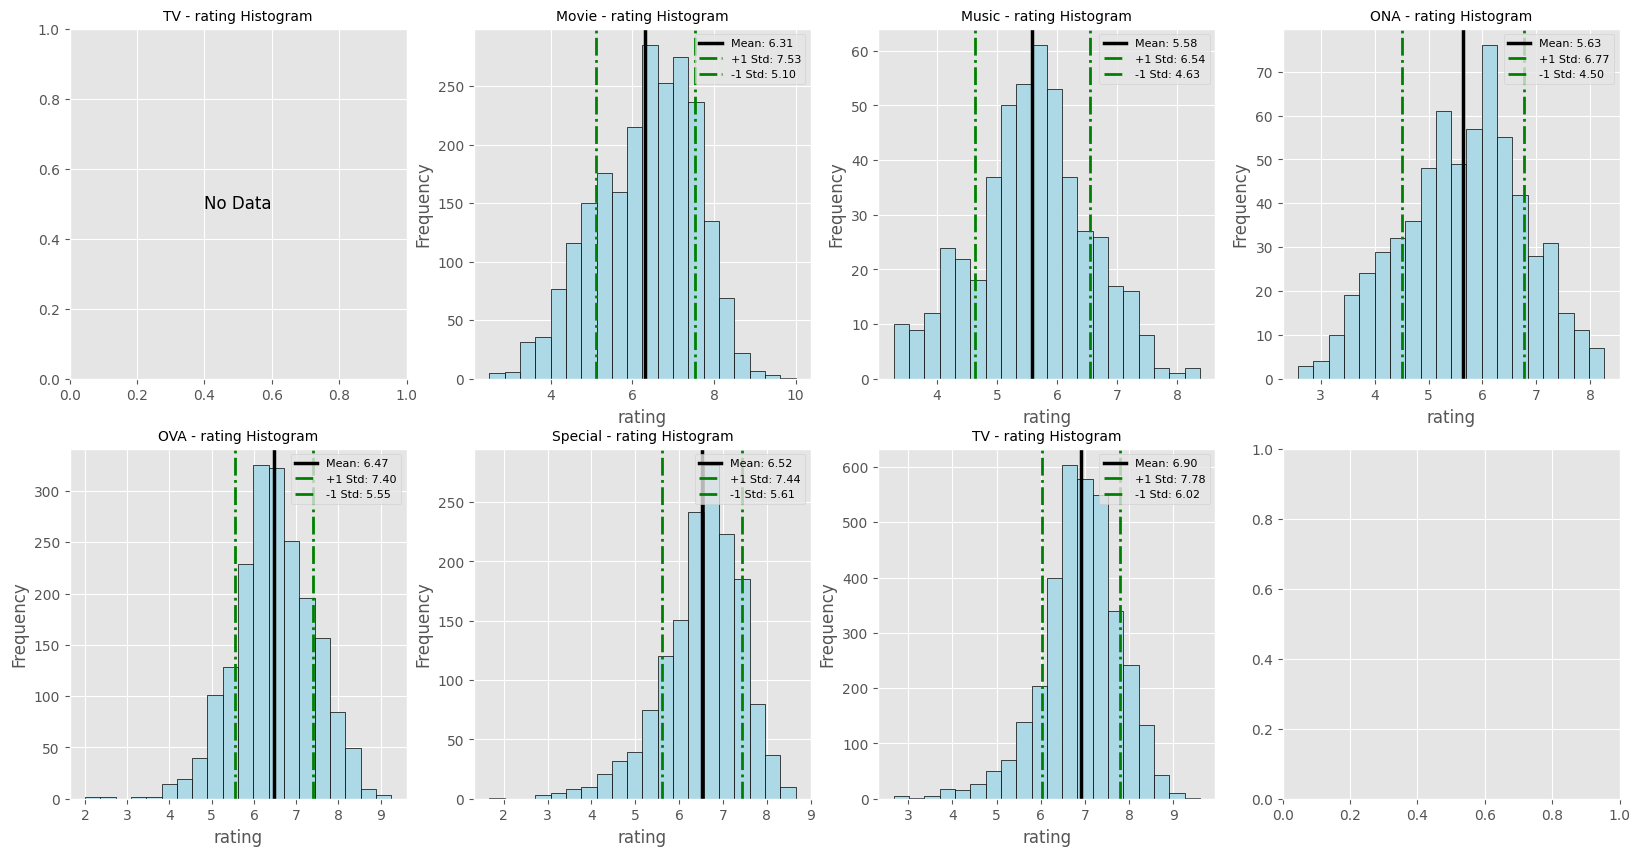

In [6]:
# First, I group the data by Type anime. For each group I calculated the mean and std
# NOTE : first chart with 'TV' title is empty, I didn't figure out why but it should have 'NaN' title, not 'TV'

categorical_col = 'type_categorical'
raw_df[categorical_col] = pd.Categorical(raw_df['type']).codes
groups = raw_df.groupby(categorical_col)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for idx, (name, group) in enumerate(groups):
    category_label = pd.Categorical(raw_df['type']).categories[name]
    col = 'rating'
    clean_data = group[col].dropna()
    
    if clean_data.empty:  # If there are no valid (non-NaN) values, skip this plot
        axs[idx].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx].set_title(f'{category_label} - {col} Histogram', fontsize=10)
        continue

    m = clean_data.mean()
    std = clean_data.std()

    axs[idx].hist(clean_data, bins=20, color='lightblue', edgecolor='black')
    axs[idx].set_title(f'{category_label} - {col} Histogram', fontsize=10)
    
    axs[idx].axvline(m, color='black', linestyle='-', linewidth=2.5, label=f'Mean: {m:.2f}')
    
    axs[idx].axvline(m + std, color='green', linestyle='-.', linewidth=2, label=f'+1 Std: {m + std:.2f}')
    axs[idx].axvline(m - std, color='green', linestyle='-.', linewidth=2, label=f'-1 Std: {m - std:.2f}')
    
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel('Frequency')

    axs[idx].legend(loc='upper right', fontsize=8)

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам. (1 балл)
График постройте для топ-15 жанров по рейтингу

In [7]:
# 1. Find top 15 genres
first_n_top_genres = 15
rating_of_first_n_top_genres = genre_df.groupby('processed_genre')['rating'].mean().sort_values(ascending=False).head(first_n_top_genres)
top_15_genres, _ = rating_of_first_n_top_genres.index, rating_of_first_n_top_genres.values

# 2. Get rating histogram, mean_rating, std_mean, and quantiles
from collections import defaultdict
genres_with_histogram_and_metrics = defaultdict()

for genre in top_15_genres:
    current_genre_df = genre_df[genre_df['processed_genre'] == genre]
    current_genre_df = current_genre_df[['rating']].dropna()  # Drop NaN values to not affect the metrics
    
    # Mean and standard deviation
    rating_mean = current_genre_df['rating'].mean()
    rating_std = current_genre_df['rating'].std()
    
    # Quantiles
    quantile_25 = current_genre_df['rating'].quantile(0.25)
    quantile_50 = current_genre_df['rating'].quantile(0.50)
    quantile_75 = current_genre_df['rating'].quantile(0.75)
    
    # Interquartile Range (IQR)
    iqr = quantile_75 - quantile_25
    
    genres_with_histogram_and_metrics[genre] = {
            'rating': current_genre_df['rating'],
            'mean': rating_mean,
            'std': rating_std,
            '25%': quantile_25,
            '50%': quantile_50,
            '75%': quantile_75,
            'IQR': iqr
        }

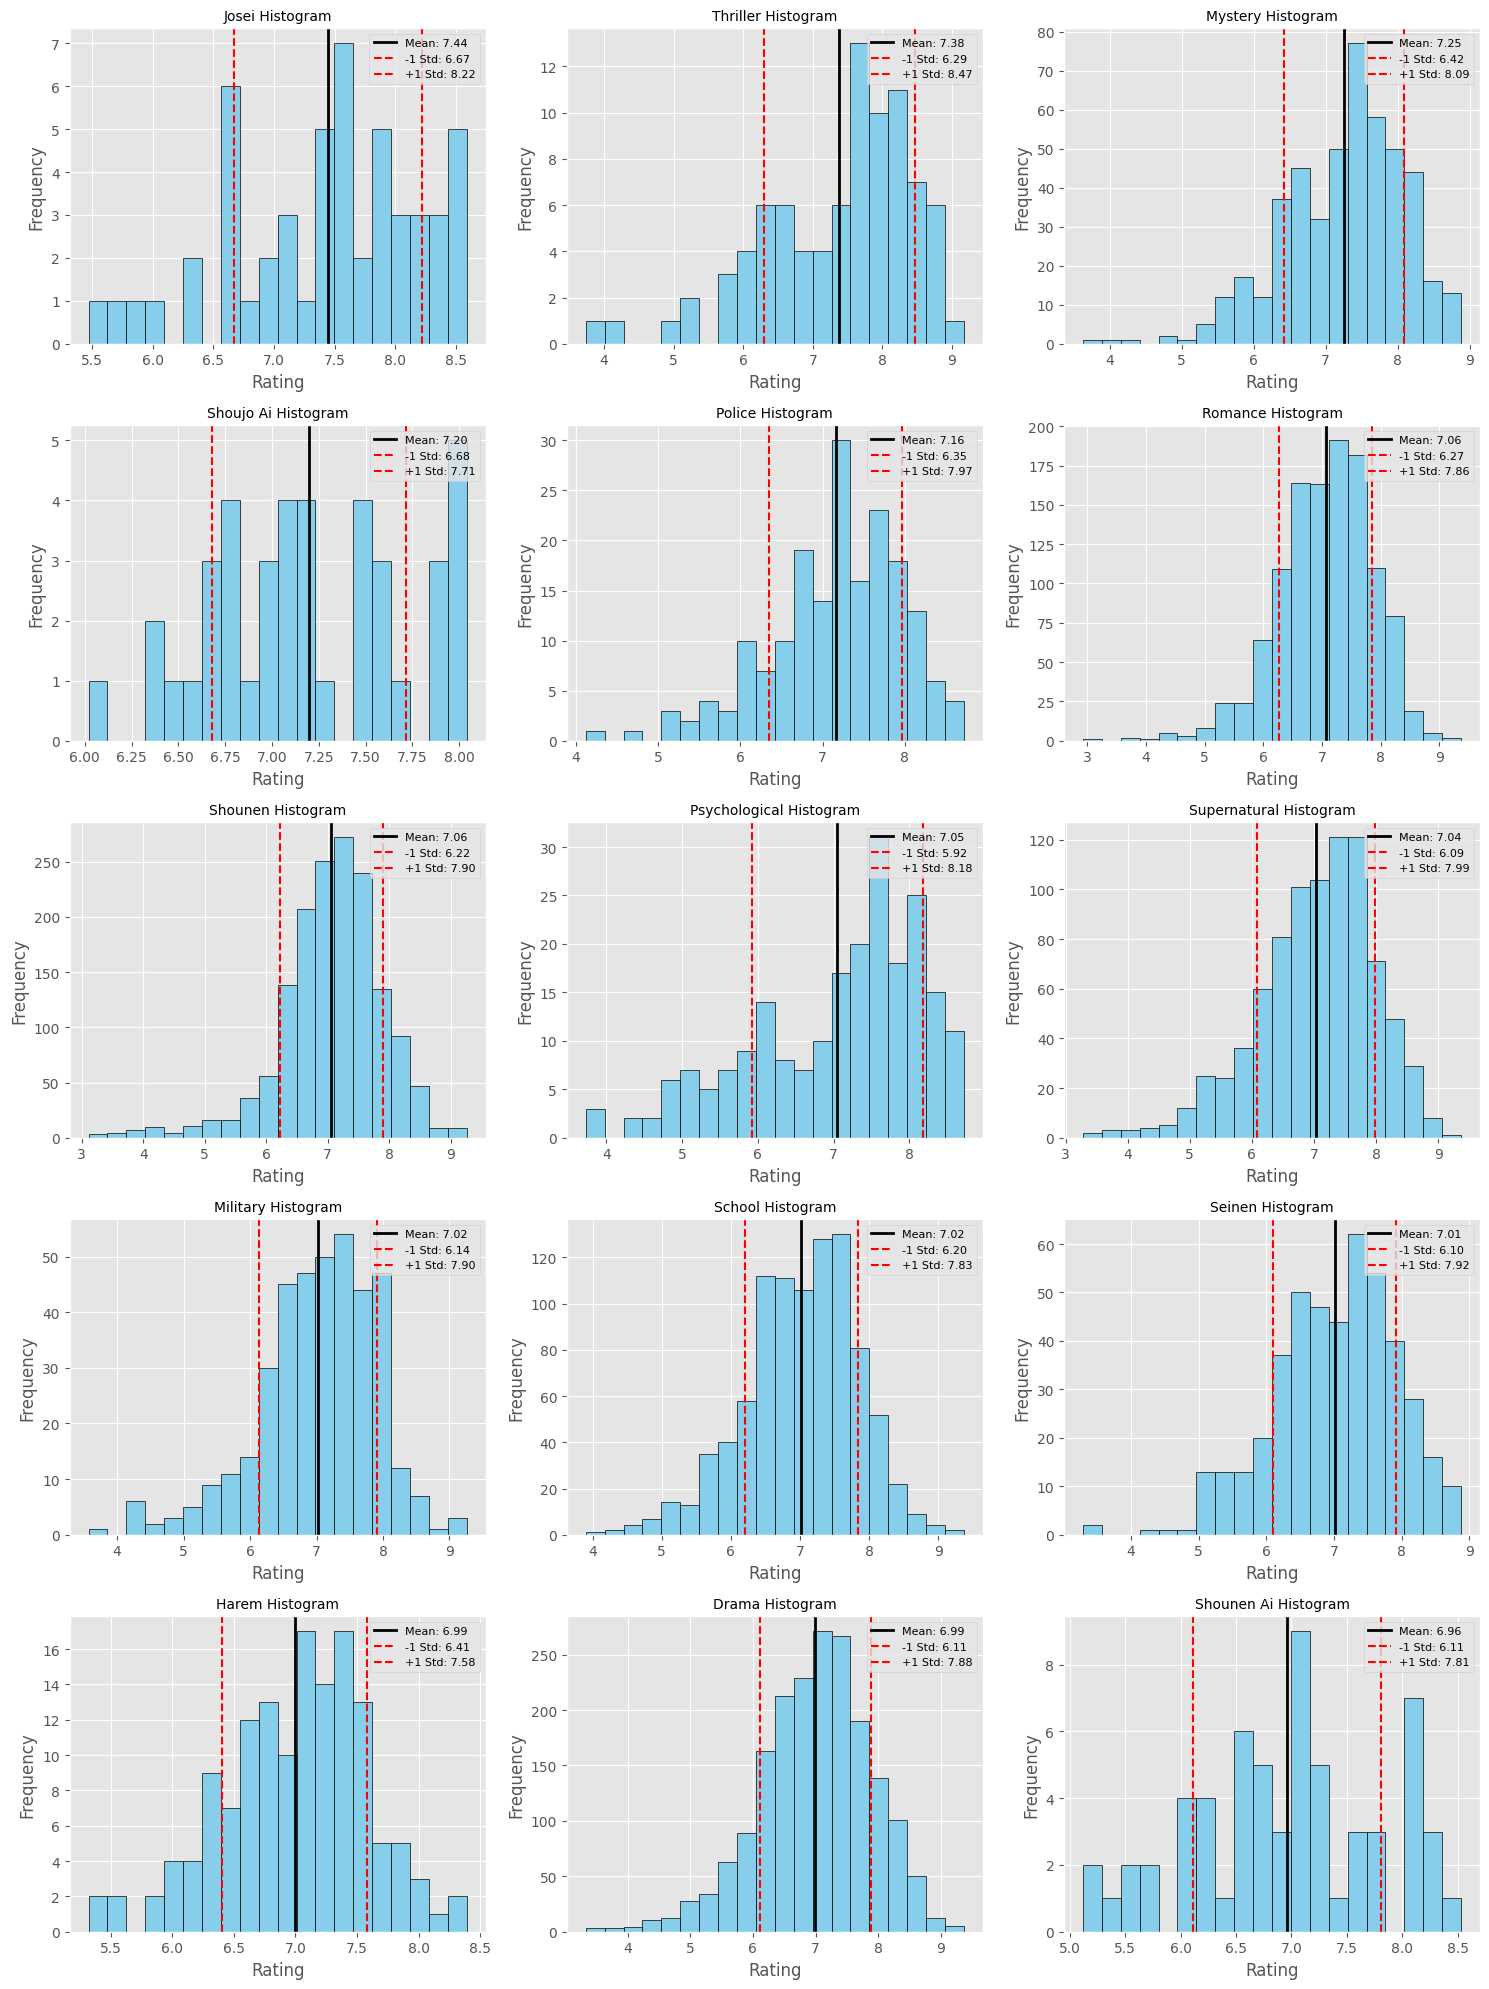

In [8]:
# 3. Visualize the plots

fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # 5 rows, 3 columns for 15 plots

axs = axs.ravel()

for idx, genre_data in enumerate(genres_with_histogram_and_metrics):
    ratings = genres_with_histogram_and_metrics[genre_data]['rating']
    mean_rating = genres_with_histogram_and_metrics[genre_data]['mean']
    std_rating = genres_with_histogram_and_metrics[genre_data]['std']
    
    axs[idx].hist(ratings, bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'{genre_data} Histogram', fontsize=10)
    
    axs[idx].axvline(mean_rating, color='black', linestyle='-', linewidth=2, label=f'Mean: {mean_rating:.2f}')
    axs[idx].axvline(mean_rating - std_rating, color='red', linestyle='--', linewidth=1.5, label=f'-1 Std: {mean_rating - std_rating:.2f}')
    axs[idx].axvline(mean_rating + std_rating, color='red', linestyle='--', linewidth=1.5, label=f'+1 Std: {mean_rating + std_rating:.2f}')
    
    axs[idx].legend(loc='upper right', fontsize=8)
    
    axs[idx].set_xlabel('Rating')
    axs[idx].set_ylabel('Frequency')

plt.tight_layout()


## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type. (1 балл)

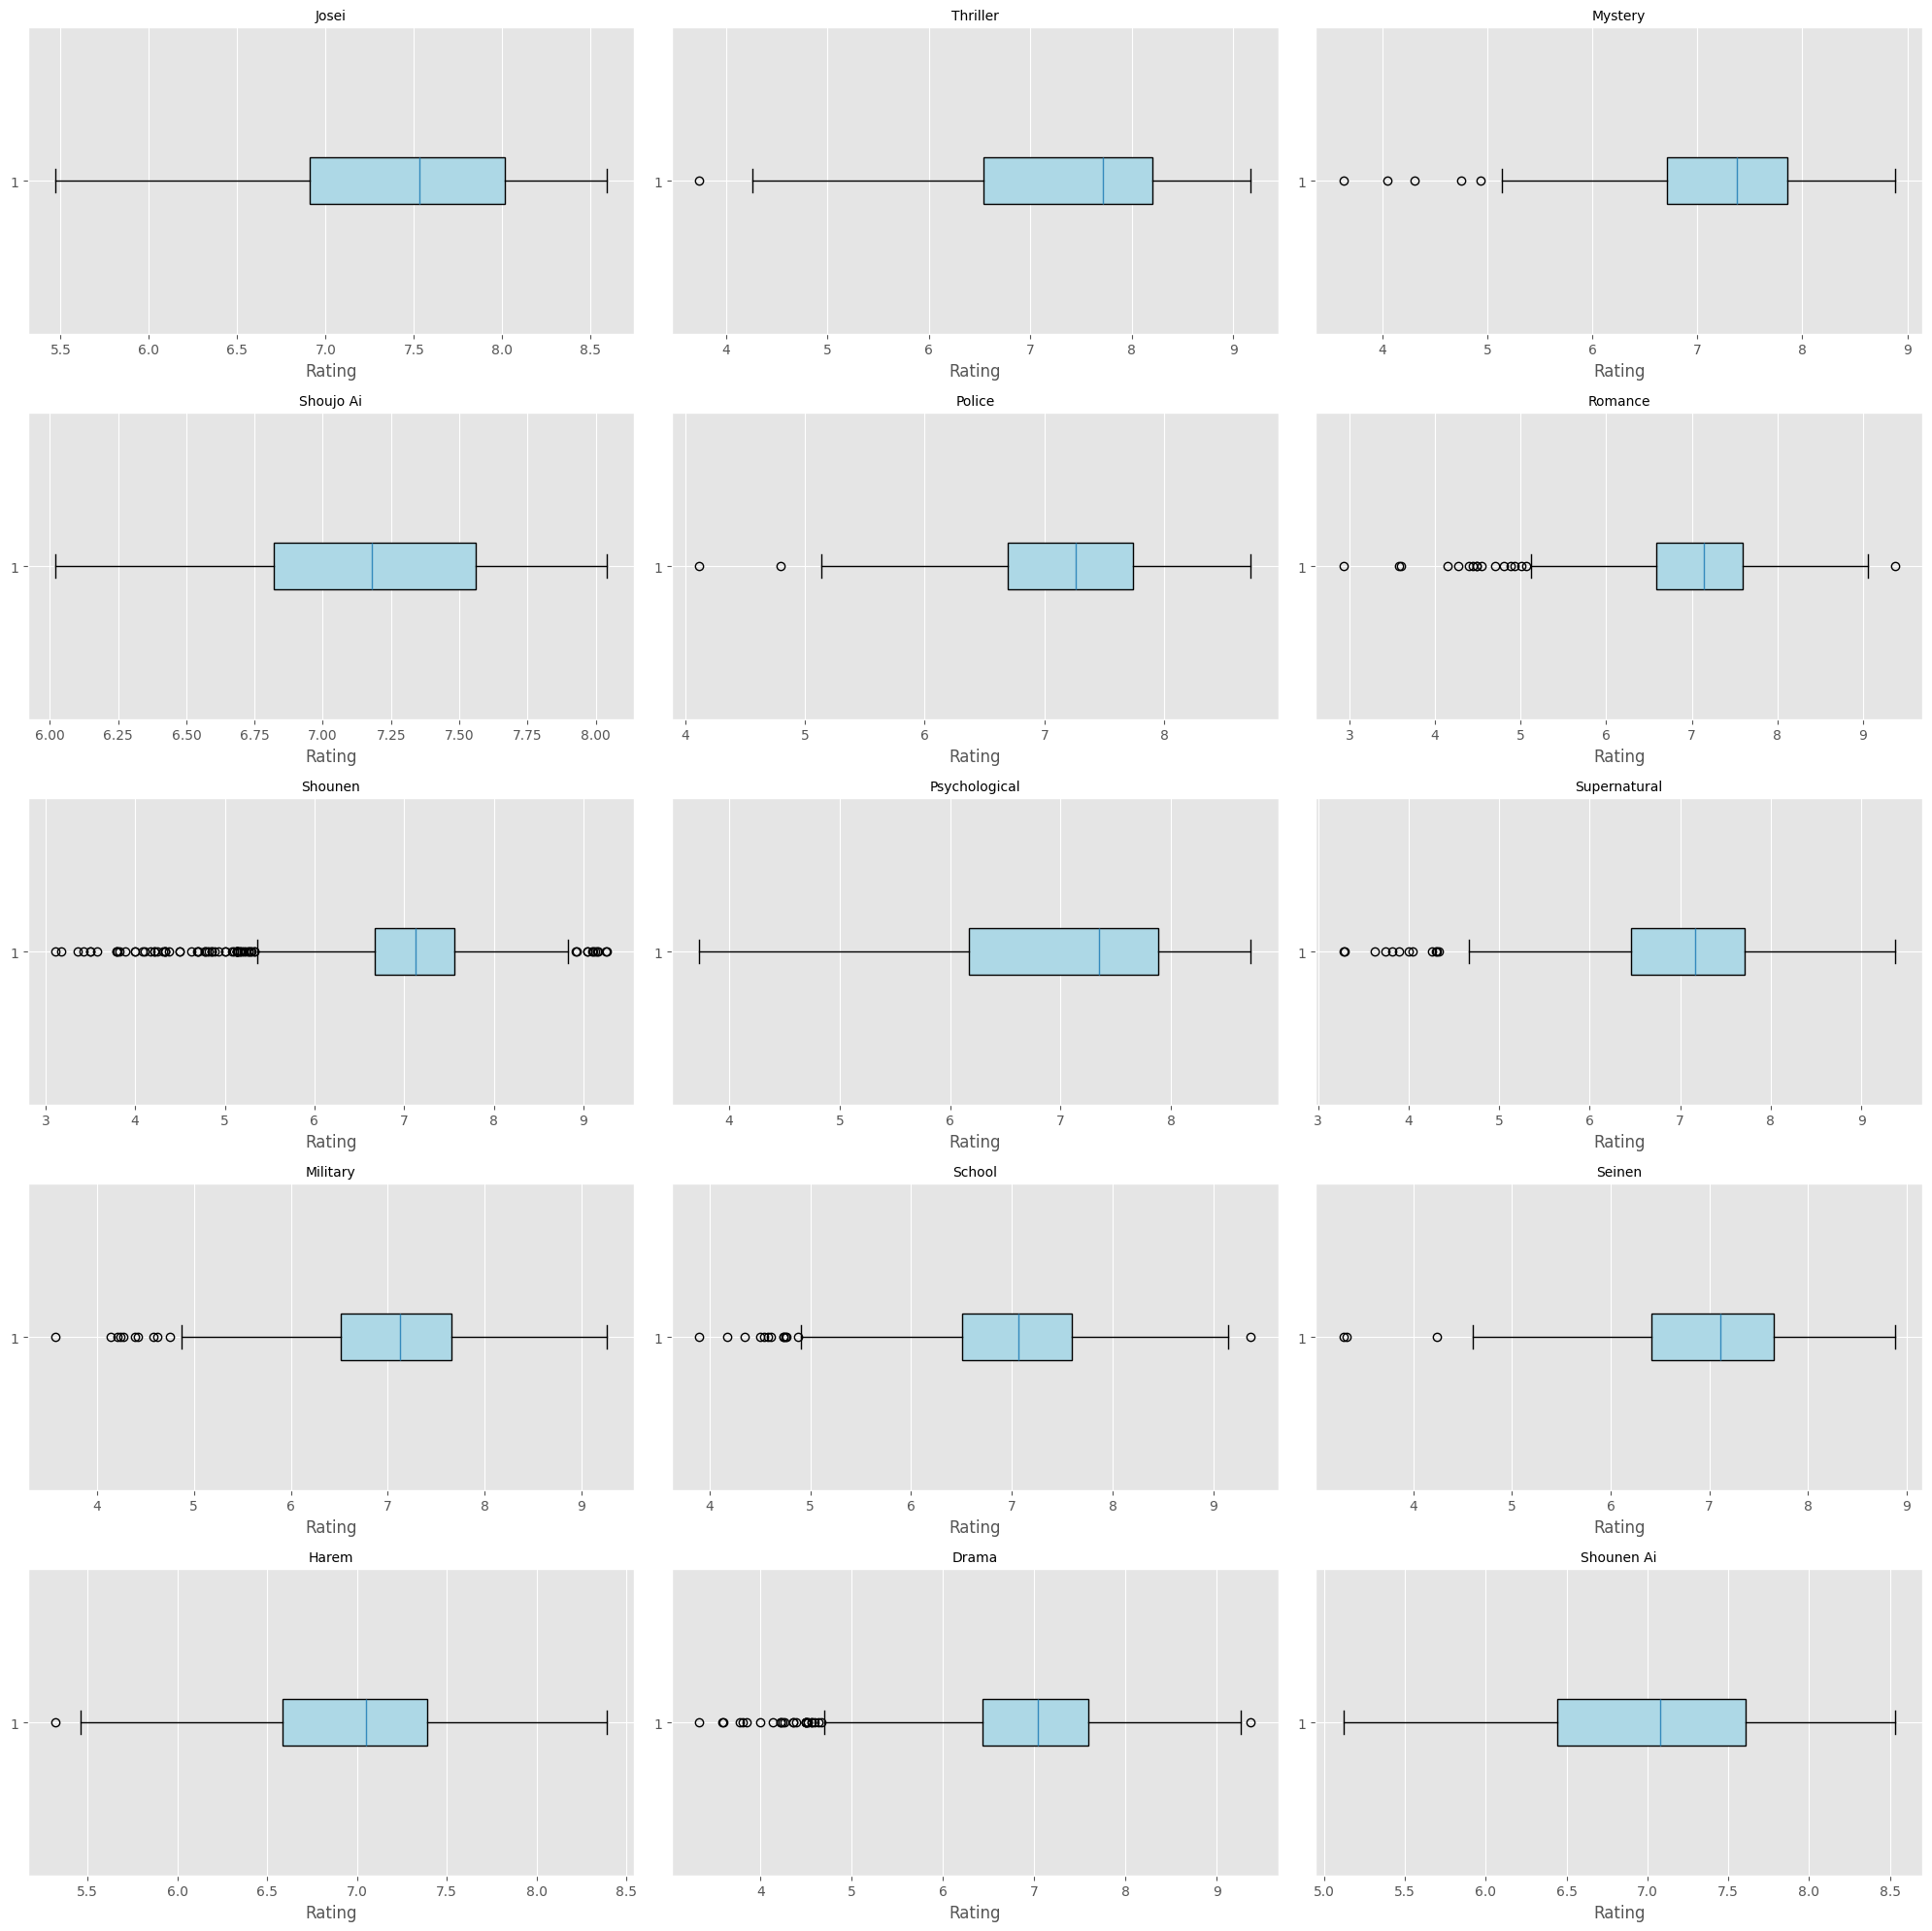

In [9]:
# 1. Genre
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
axs = axs.ravel()  

for idx, genre in enumerate(genres_with_histogram_and_metrics):
    data = genres_with_histogram_and_metrics[genre]['rating']
    
    axs[idx].boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[idx].set_title(f'{genre}', fontsize=10)
    
    axs[idx].set_xlabel('Rating')

plt.tight_layout()

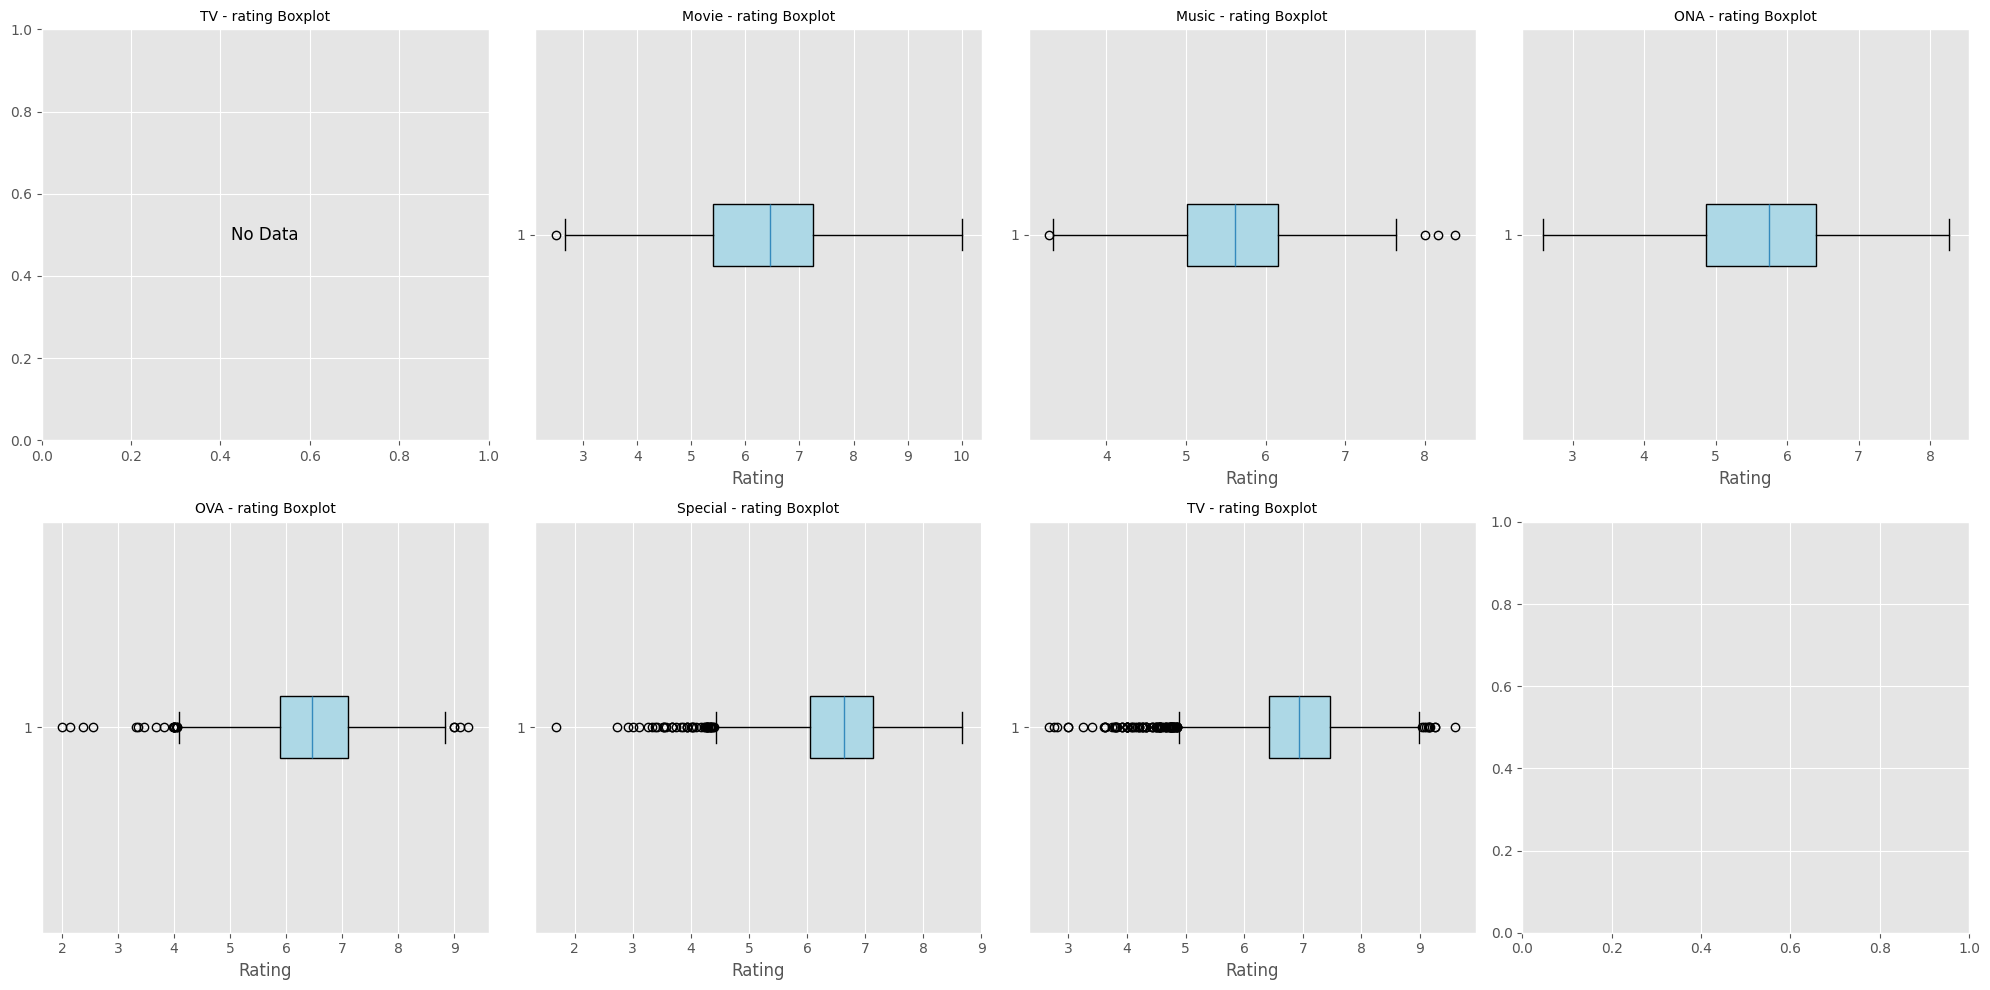

In [10]:
# 2. Type
categorical_col = 'type_categorical'
raw_df[categorical_col] = pd.Categorical(raw_df['type']).codes
groups = raw_df.groupby(categorical_col)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for idx, (name, group) in enumerate(groups):
    category_label = pd.Categorical(raw_df['type']).categories[name]
    col = 'rating'

    clean_data = group[col].dropna()
    
    if clean_data.empty:
        axs[idx].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[idx].set_title(f'{category_label} - {col} Boxplot', fontsize=10)
        continue

    axs[idx].boxplot(clean_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[idx].set_title(f'{category_label} - {col} Boxplot', fontsize=10)
    
    axs[idx].set_xlabel('Rating')

plt.tight_layout()

## 5. Насколько часто встречаются аниме с одним или двумя жанрами? (1 балл)

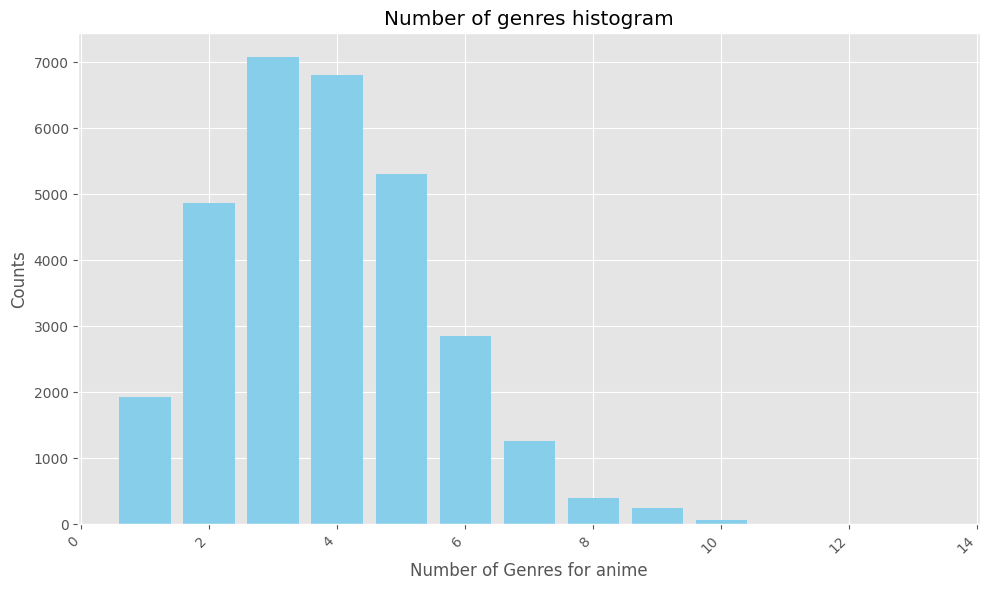

In [11]:
number_of_genres, counts = np.unique(genre_df['number_of_genres'], return_counts=True)
visualize_histogram(number_of_genres, counts, 'Number of Genres for anime', 'Counts', 'Number of genres histogram')

## 6. Сколько в среднем эпизодов приходится на аниме типа == TV? (1 балл)

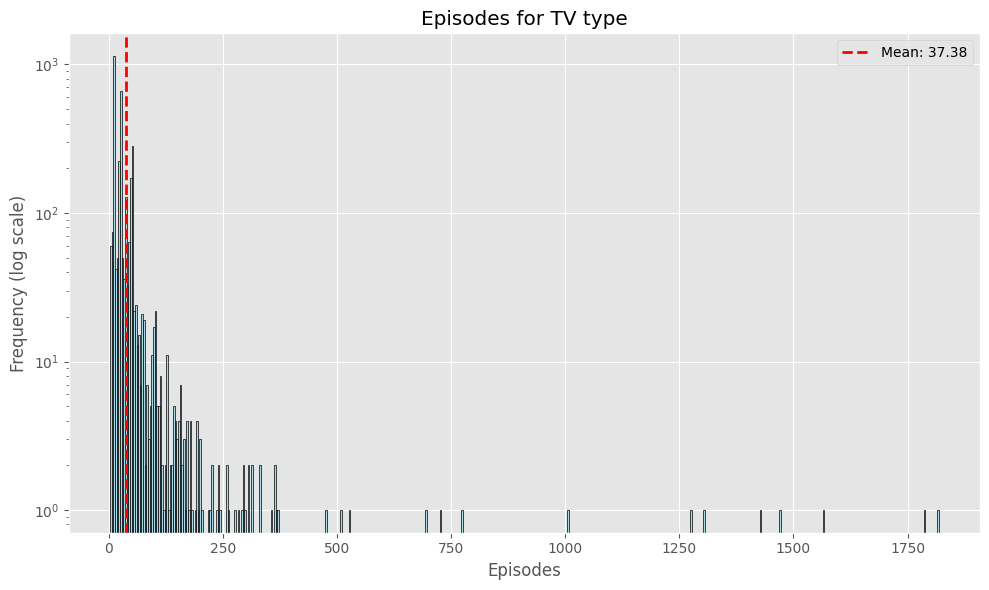

In [12]:
import matplotlib.pyplot as plt

def visualize_logarithmic_histogram_with_mean(data, bins, xlabel: str, ylabel: str, title: str):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color='lightblue', edgecolor='black')
    mean_value = data.mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    
    plt.yscale('log')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.legend(loc='upper right')
    
    plt.tight_layout()

only_tv_df = raw_df[raw_df['type'] == 'TV']
only_tv_df.loc[:, 'episodes'] = pd.to_numeric(only_tv_df['episodes'], errors='coerce')
only_tv_df = only_tv_df.dropna(subset=['episodes'])

visualize_logarithmic_histogram_with_mean(only_tv_df['episodes'], 500, 'Episodes', 'Frequency (log scale)', 'Episodes for TV type')


## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий. (1 балл)
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


In [13]:
anime_df = raw_df.copy()
anime_df['episodes'] = pd.to_numeric(raw_df['episodes'], errors='coerce')
anime_df = anime_df.dropna(subset=['rating'])

columns_to_analyze = ['episodes', 'rating', 'members']
mean_std_info = anime_df[columns_to_analyze].agg(['mean', 'std'])

def count_anomalies(column):
    mean = mean_std_info[column]['mean']
    std_dev = mean_std_info[column]['std']
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    anomalies = anime_df[(anime_df[column] < lower_bound) | (anime_df[column] > upper_bound)]
    return len(anomalies)

anomalies_count = {col: count_anomalies(col) for col in columns_to_analyze}
anomalies_count


{'episodes': 63, 'rating': 41, 'members': 213}

## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков. (1 балл)

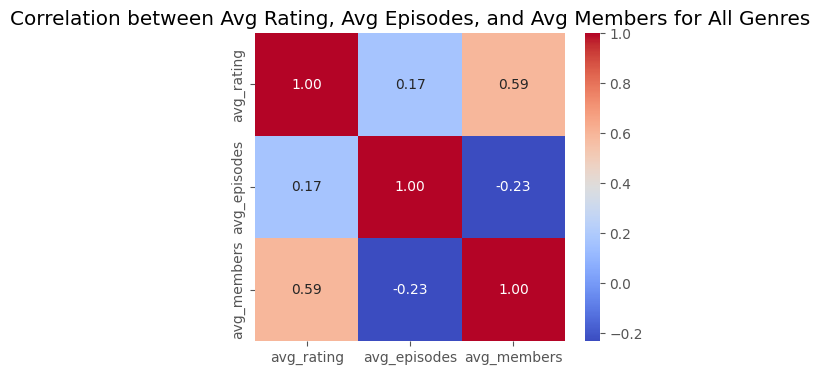

In [14]:
genre_df['episodes'] = pd.to_numeric(raw_df['episodes'], errors='coerce')
genre_grouped = genre_df.groupby('processed_genre').agg(
    avg_rating=('rating', 'mean'),
    avg_episodes=('episodes', 'mean'),
    avg_members=('members', 'mean')
).reset_index()

correlation_matrix = genre_grouped[['avg_rating', 'avg_episodes', 'avg_members']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Avg Rating, Avg Episodes, and Avg Members for All Genres')
plt.show()



## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type. (1 балл)

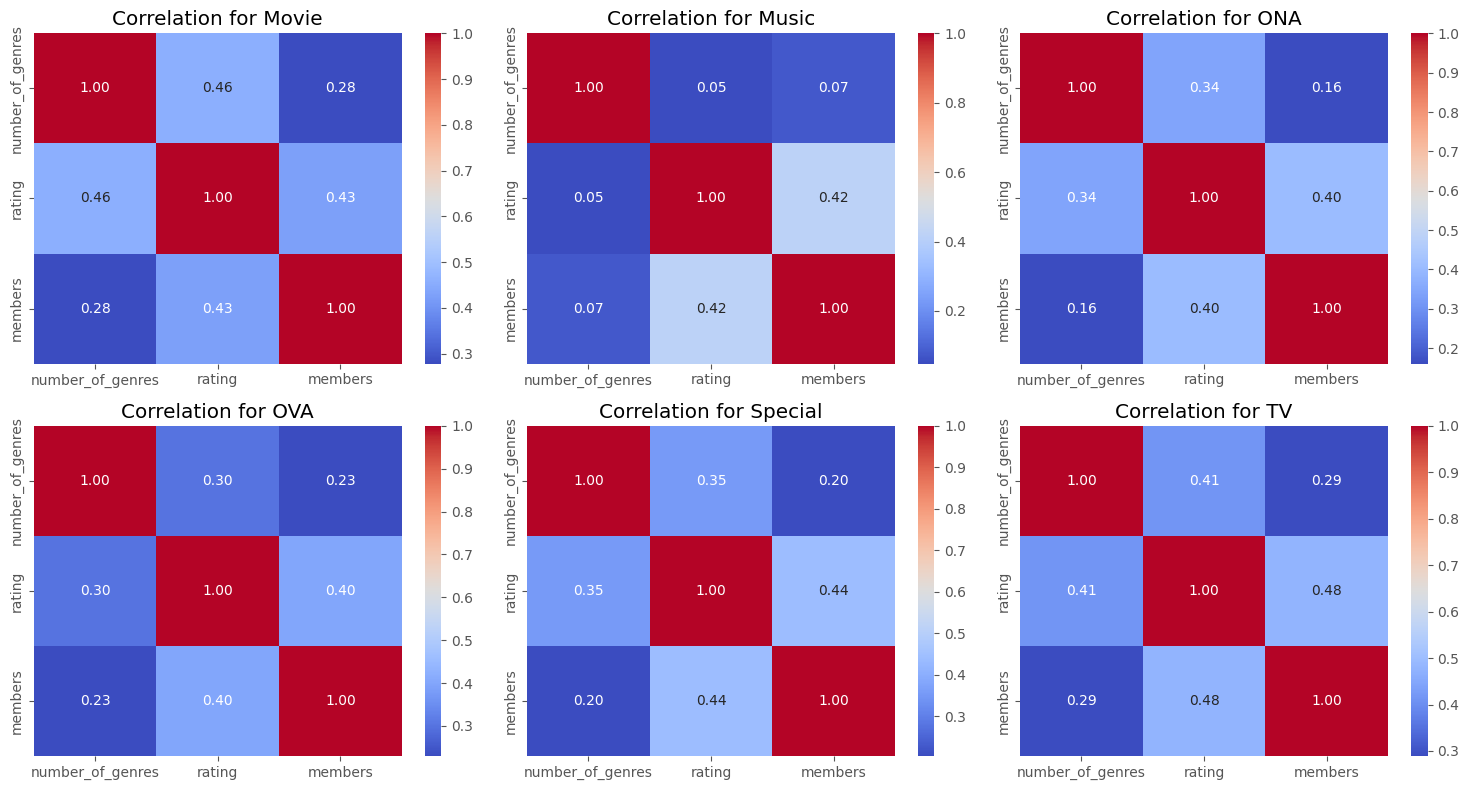

In [40]:
# For each anime type --> number of genres | rating  | members
def get_number_of_genres(genres: str):
    list_with_genres = genres.split(', ')
    return len(list_with_genres)

df = raw_df.copy()
df = df.dropna(subset=['genre'])
df['number_of_genres'] = df['genre'].apply(get_number_of_genres)

grouped_based_on_type = df.groupby('type')
correlation_matrix_for_type_groups = defaultdict()
for group_name, group_data in grouped_based_on_type:
    correlation_matrix_for_type_groups[group_name] = group_data[['number_of_genres', 'rating', 'members']].corr()

num_groups = len(correlation_matrix_for_type_groups)
nrows = 2  
ncols = int(np.ceil(num_groups / nrows))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()
for ax, (group_type, correlation_matrix) in zip(axes, correlation_matrix_for_type_groups.items()):
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f'Correlation for {group_type}')

for ax in axes[num_groups:]:
    fig.delaxes(ax)

plt.tight_layout()

## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков. (1 балл)

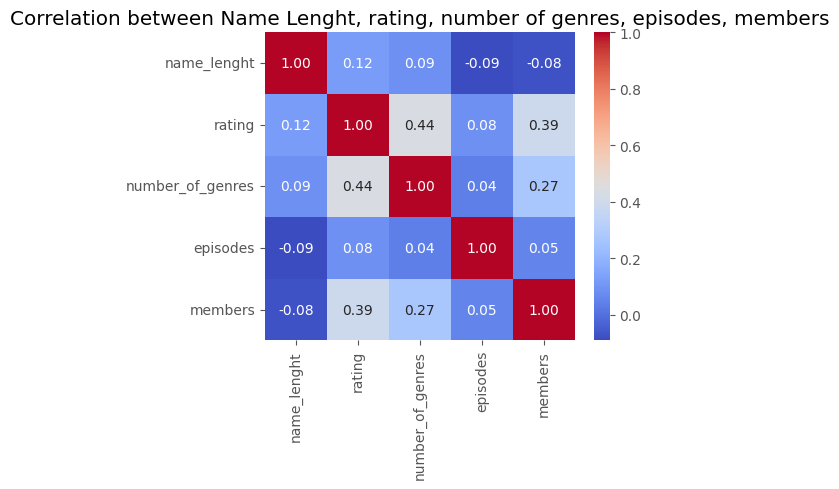

In [43]:
df['name_lenght'] = df['name'].apply(len)
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
correlation_matrix_task_10 = df[['name_lenght', 'rating', 'number_of_genres', 'episodes', 'members']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix_task_10, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Name Lenght, rating, number of genres, episodes, members')
plt.show()

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

 ### Задание 11: Нормальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5.
Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \
Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

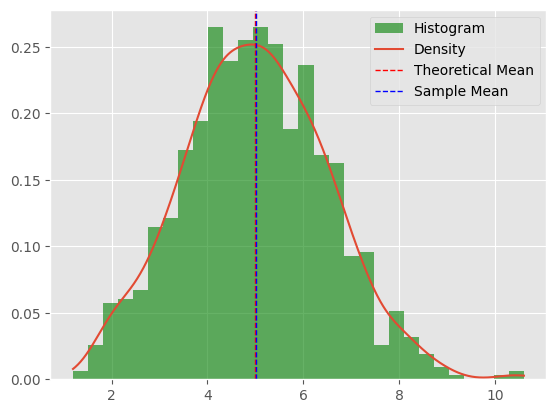

Sample Mean: 5.00338963154662
Sample Median: 4.980998028293263
Sample Mode: 1.194539896647333
Sample Standard Deviation: 1.5033074142216927
Percentage of values deviating from mean by more than one standard deviation: 32.40%
Theoretical percentage for normal distribution: 31.73%


In [45]:
import numpy as np
import scipy.stats as stats

# Step 1: Generate a sample of 1000 elements from a normal distribution with μ=5 and σ=1.5
mu = 5
sigma = 1.5
sample_size = 1000
sample = np.random.normal(mu, sigma, sample_size)

# Step 2: Descriptive statistics
sample_mean = np.mean(sample)
sample_median = np.median(sample)
sample_mode = stats.mode(sample, keepdims=False)[0]  # mode returns a tuple, we take the first element
sample_std = np.std(sample, ddof=1)  # Use ddof=1 to get the sample standard deviation

# Step 3: Histogram and density plot (this is commented out, as you requested no visualization)
import matplotlib.pyplot as plt
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
density = stats.gaussian_kde(sample)
x_vals = np.linspace(min(sample), max(sample), 1000)
plt.plot(x_vals, density(x_vals), label='Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=1, label='Theoretical Mean')
plt.axvline(sample_mean, color='blue', linestyle='dashed', linewidth=1, label='Sample Mean')
plt.legend()
plt.show()

# Step 4: Analyze deviations
# Calculate the percentage of values more than one standard deviation away from the mean
deviation_threshold = 1 * sigma
deviated_values = np.sum(np.abs(sample - mu) > deviation_threshold)
deviated_percentage = deviated_values / sample_size * 100

# Theoretical percentage of values more than one standard deviation away for normal distribution
theoretical_percentage = (1 - stats.norm.cdf(1) + stats.norm.cdf(-1)) * 100

# Output the calculated statistics
print(f"Sample Mean: {sample_mean}")
print(f"Sample Median: {sample_median}")
print(f"Sample Mode: {sample_mode}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Percentage of values deviating from mean by more than one standard deviation: {deviated_percentage:.2f}%")
print(f"Theoretical percentage for normal distribution: {theoretical_percentage:.2f}%")


### Задание 12: Экспоненциальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \


### Задание 13: Биномиальное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

### Задание 14: Геометрическое распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

### Задание 15: Равномерное распределение (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

### Задание 16: Распределение Пуассона (1 балл)
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

# 3 Часть

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов (3 балла все задание)
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов (3 балла все задание)
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки. (1 балл)

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов (3 балла все задание)
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки. (1 балл)
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки. (1 балл)